# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# **Data Overview**


##Loading the data

In [4]:
# Load the image file of the dataset, we got an error here and hence had to write code to let pickled object arrays stored in noy files be loaded correctly
# Also the data loaded in mpy array format
images = np.load('/content/images_proj.npy', allow_pickle=True)

# Load the labels file of the dataset
labels = pd.read_csv('/content/Labels_proj.csv')

# Printing the shape of the images (implies 631 images with 200x200 2D pixel, with RGB channel but in npy format they are in BRG colour instead) and labels (implies 1 Dimension with 631 labels)
print("Shape of images array:", images.shape)
print("Shape of labels dataframe:", labels.shape)

Shape of images array: (631, 200, 200, 3)
Shape of labels dataframe: (631, 1)


### Observation

- There are 631 RGB channel (BRG - Blue Red Green) images of shape 200 x 200 X 3, each image having BRG (3) channels, for each of the colour.
- With the Labels file mapping to each of the image, in a single dimension alone as either 1 (depicting Helmets worn) or 0 (Images showing workers not wearing helmets).

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

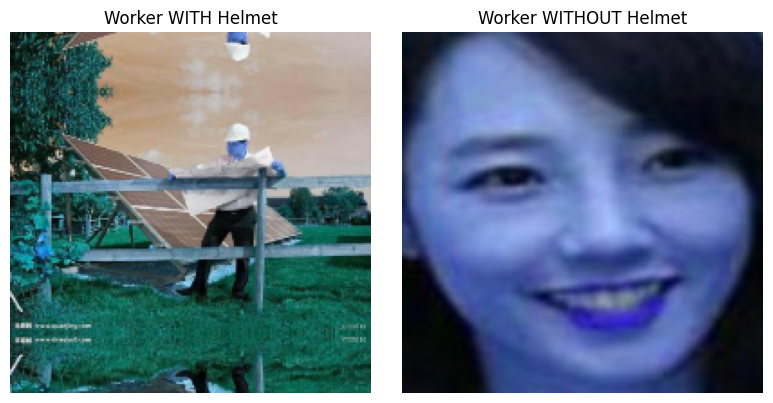

In [5]:
# Assigning the index as 0 for the two different labels (with helmet and without helmet)
helmet_indices = np.where(labels == 1)[0]
no_helmet_indices = np.where(labels == 0)[0]

# Select one image from each class, using the random function of the numpy package
# and save them in different variables
helmet_img = images[np.random.choice(helmet_indices)]
no_helmet_img = images[np.random.choice(no_helmet_indices)]

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Display "With Helmet" image
axes[0].imshow(helmet_img)
axes[0].set_title("Worker WITH Helmet")
axes[0].axis('off')

# Display "Without Helmet" image
axes[1].imshow(no_helmet_img)
axes[1].set_title("Worker WITHOUT Helmet")
axes[1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

- The function, plot_images, randomly selects images from a dataset and displays them in a 3x4 grid. It retrieves corresponding labels from a dictionary and sets them as titles for each image - but note the colour of the image is in BRG channel as shown above !

In [6]:
# Defining a Custom Function to randomly select images and also display them with their corresponding labels
def plot_images(images,labels):
# Detects the column label in the .csv file to be Label for keys field variable from the labels dataframe
    keys=dict(labels['Label'])
# Setting 7 rows and 7 columns for the images selected randomly to be displayed
    rows = 7
    cols = 7
    fig = plt.figure(figsize=(10, 8))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.imshow(images[random_index, :])
            ax.set_title(keys[random_index])
# To show all images
    plt.show()

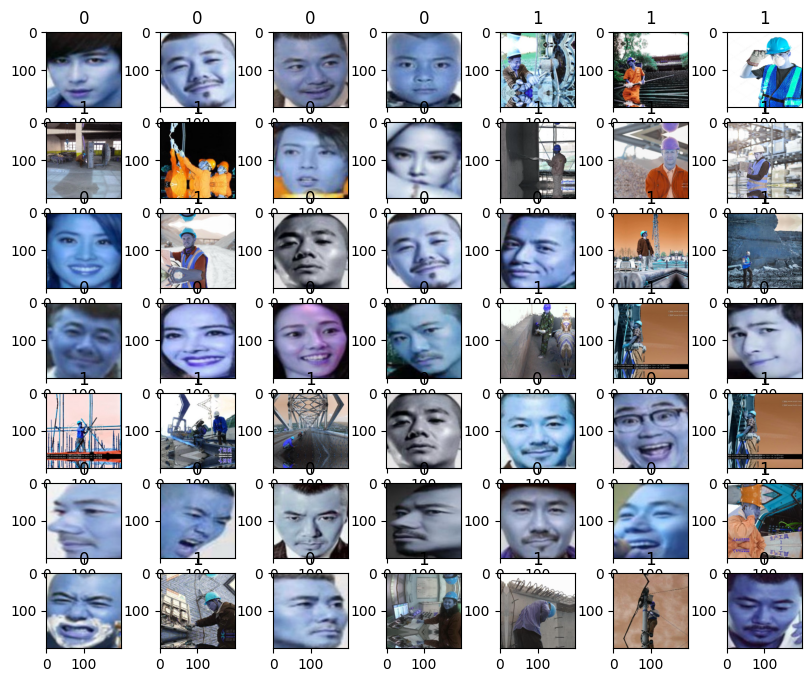

In [7]:
# Invoking the plot_images function to diplay the images along with their corresponding labels
# with 1s representing the images with the Helmets on and 0s without any safety helmets, but still in BRG colour
plot_images(images,labels)

### Converting the images from BGR to RGB using cvtColor function of OpenCV

In [8]:
# Converting the images from BGR to RGB
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

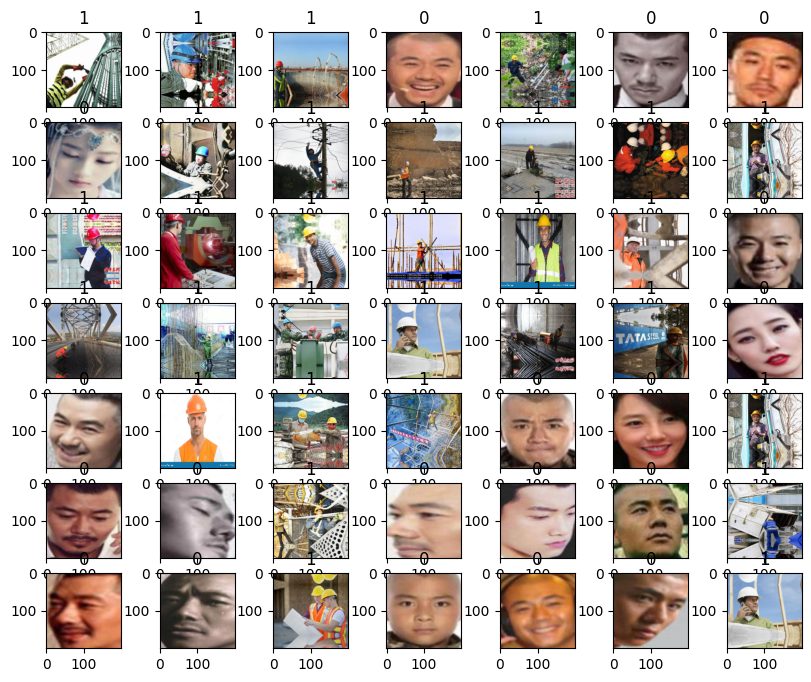

In [9]:
# Invoking the plot_images function to diplay the images along with their corresponding labels
# with 1s representing the images with the Helmets on and 0s without any safety helmets, but
# this time the images are modified to be in the RGB channel colours instead of BRG
plot_images(images,labels)

## Checking for class imbalance


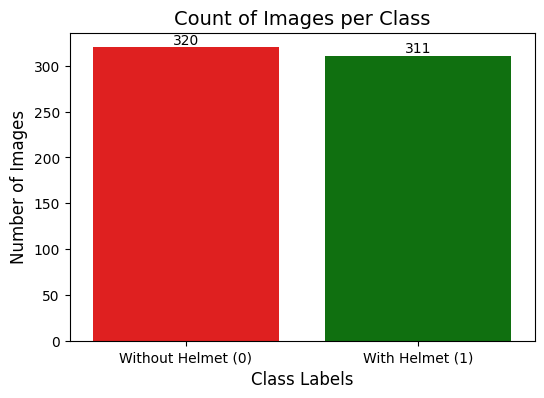

In [10]:
# Create a count plot with red and green palette colours
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=labels.iloc[:, 0], palette=['red', 'green'])

# Add exact counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, )

# Add labels for X axis , Y axis and Title for the plot
plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Count of Images per Class", fontsize=14)
# Assigning the class Label as Without Helmet (with count of 0s) and
# the class Label count as With Helmet (for count of all 1s)
plt.xticks(ticks=[0, 1], labels=["Without Helmet (0)", "With Helmet (1)"])  # Rename x-axis labels

# Show plot
plt.show()

### Observation
- As we can see from the above plot, the dataset is quite balanced, with balanced classes - there is a reduction of skewed predictions !
- There are 320 images (without helmets, upon counting all 0s) in each category vs 311 images (wearing helmets, upon counting all 1s).

# **Data Preprocessing**

## Converting images to grayscale

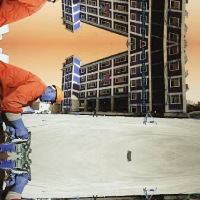

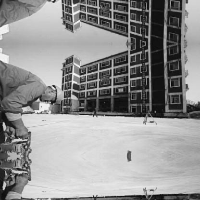

In [11]:
# Initialize an empty list called images_grey
images_gray = []
# Looping through each of the BGR colour format images to convert to a grayscale using OpenCV's computer vision function
for i in range(len(images)):
    img_gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    images_gray.append(img_gray)

# Display a sample grayscale image of index=100, in both BGR format and gray scale image
n = 100
cv2_imshow(images[n]) # Original Image
cv2_imshow(images_gray[n]) # Gray Scale Image

In [12]:
# Function to plot the original and processed images side by side
# with Img1 being the original BGR image as is and Img2 being the Gray scale Processed image
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

## Plotting the images before and after the pre-processing steps

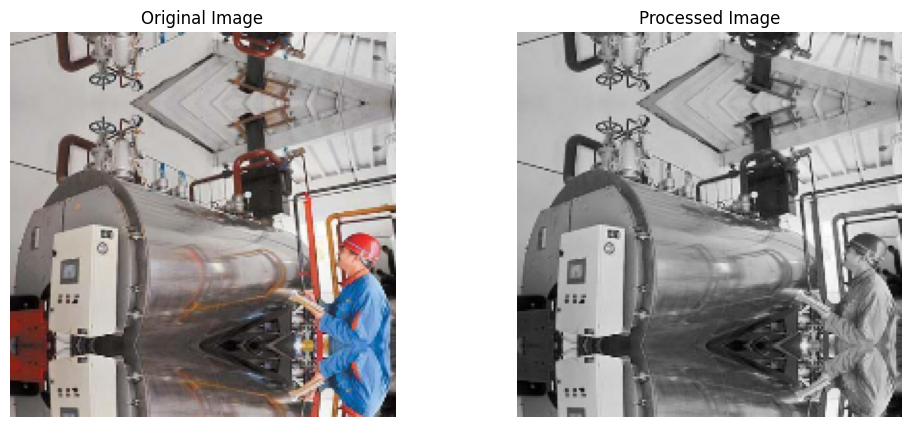

In [13]:
# Display a sample grayscale image of index=126, in both BGR format and gray scale image
n = 126
grid_plot(images[n],images_gray[n],gray=True)

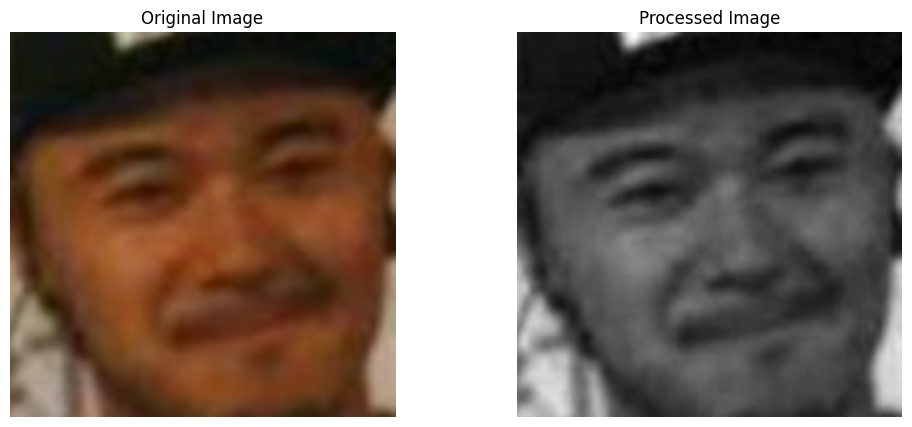

In [14]:
# Display a sample grayscale image of index=520, in both BGR format and gray scale image
n = 520
grid_plot(images[n],images_gray[n],gray=True)

### Splitting the dataset



- With the available images in our dataset, we will only use 15% of our data for testing, 15% of our data for validation and 70% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.
- We are not using the Grayscale images, instead we are using the RGB colour photos because of the images being compatible with the VGG16 model (also trained on the RGB channel). This is a trade-off in terms of the compatibility vs performance or computing resources utilized and we lean on to the VGG16's compatibility !

In [15]:
# First, we proceed with splitting the Original Images in 70:30 ratio with 70% of images available for the Training; while 30% is kept in Temperory variable
X_train, X_temp, y_train, y_temp = train_test_split(np.array(images),labels , test_size=0.3, random_state=42,stratify=labels)
# Then, the Temporary variable is equally split (test_size=0.5) between the Validation and Test images - each equally at 15% of overall 631 images
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [16]:
# Printing the shape of the split of the available images
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(441, 200, 200, 3) (441, 1)
(95, 200, 200, 3) (95, 1)
(95, 200, 200, 3) (95, 1)


### Observation
- There are 441 images in the Training dataset, while 95 and 95 images in the Validation and Testing datasets respectively !

### Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [17]:
# Data Normalization can indirectly benefit with prevention of Overfitting occurrence
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

### Encoding the target labels
- Convert labels from categories to one hot vectors

- LabelBinarizer is a preprocessing utility in sklearn.preprocessing that converts categorical labels into a binary (one-hot) representation.

--> It is useful for transforming multi-class labels into a format suitable for models that require numerical input.

--> fit_transform() learns the unique classes from the data and converts labels into a binary format in one step.

--> transform() converts new data using the already learned classes without refitting.

In [18]:
from sklearn.preprocessing import LabelBinarizer
# Importing LabelBinarizer to perform one-hot encoding
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.transform(y_val)
y_test_encoded = enc.transform(y_test)

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [19]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable (can be pandas DataFrame or NumPy array)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1) > 0.5

    # Ensure target is a NumPy array for consistent handling
    if isinstance(target, pd.DataFrame):
        target = target.to_numpy().reshape(-1)
    else:
        target = target.reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [20]:
# Deining the Custom function for plotting Confusion Matrix
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    # Ensure target is a NumPy array for consistent handling
    if isinstance(target, pd.DataFrame):
        target = target.to_numpy().reshape(-1)
    else:
        target = target.reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

Let's build a **CNN Model**.<br>

The model has 2 main parts:
1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers for prediction.**<br><br>





The flow of our model would be as shown below:

- Our model would start with a sequential Conv2D layer with 32 filters of 3x3 filter with the ReLU activation function. This will take as input an image of size (200x200x3).
- We will also use padding in order to keep the output shape the same as that of the input shape. Hence, the hyperparameter padding = 'same'.
- This layer would also be followed by a Max Pooling layer.
- After this, we will have 2 more pairs of Conv2D and 1 Max Pooling layers, having 16 filters with a 3x3 Kernel Size and a pooling size of (4,4).
- We would flatten out the output from this pooling layer, and use a dense layer over that.
- This will be a dense layer of 4 neurons and We would have an output layer with 1 neurons, as we have 1 output class in this Binary classification problem as to whether the worker in the image is wearing a Helmet or not!

In [21]:
# Initializing Model
model_1 = Sequential()

# Convolutional layers
# Adding first conv layer with 32 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of the Images provided in this dataset
model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(200,200,3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((4,4), padding='same'))

model_1.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((4, 4), padding = 'same'))
model_1.add(Conv2D(16, (3, 3), activation='relu', padding="same"))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
# Flatten and Dense layers
model_1.add(Flatten())

# Adding a fully connected dense layer with 4 neurons
model_1.add(Dense(4, activation='relu'))

# Adding the output layer with 1 neuron and activation functions as sigmoid since this is a Binary classification problem
model_1.add(Dense(1, activation='sigmoid'))

# Compile with Adam Optimizer
opt = Adam(learning_rate=0.01)
model_1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy","f1_score"]) #Complete the code to define the metric of choice from Precision,f1_score,Recall

# Summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │        10,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,665 (72.91 KB)

 Trainable params: 18,665 (72.91 KB)

 Non-trainable params: 0 (0.00 B)

Fitting the model on the train data

In [22]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=15, # Number of iterations the model will look at the Training data
            validation_data=(X_val_normalized,y_val_encoded), # Data used to evaluate the model during training
            shuffle=True, # Shuffling each data before each epoch run execution
            batch_size=64, # Batch size determines the number of gradient considered in an update
            verbose=2 # Display the Training Progress (2 = one Line per epoch)
)

Epoch 1/15
7/7 - 5s - 735ms/step - accuracy: 0.4943 - f1_score: 0.6596 - loss: 0.8246 - val_accuracy: 0.5053 - val_f1_score: 0.6620 - val_loss: 0.6931
Epoch 2/15
7/7 - 2s - 340ms/step - accuracy: 0.5079 - f1_score: 0.6596 - loss: 0.6932 - val_accuracy: 0.5053 - val_f1_score: 0.6620 - val_loss: 0.6932
Epoch 3/15
7/7 - 1s - 72ms/step - accuracy: 0.5079 - f1_score: 0.6596 - loss: 0.6931 - val_accuracy: 0.5053 - val_f1_score: 0.6620 - val_loss: 0.6933
Epoch 4/15
7/7 - 1s - 87ms/step - accuracy: 0.5079 - f1_score: 0.6596 - loss: 0.6931 - val_accuracy: 0.5053 - val_f1_score: 0.6620 - val_loss: 0.6933
Epoch 5/15
7/7 - 0s - 71ms/step - accuracy: 0.5079 - f1_score: 0.6596 - loss: 0.6931 - val_accuracy: 0.5053 - val_f1_score: 0.6620 - val_loss: 0.6932
Epoch 6/15
7/7 - 1s - 84ms/step - accuracy: 0.5079 - f1_score: 0.6596 - loss: 0.6931 - val_accuracy: 0.5053 - val_f1_score: 0.6620 - val_loss: 0.6932
Epoch 7/15
7/7 - 0s - 65ms/step - accuracy: 0.5079 - f1_score: 0.6596 - loss: 0.6931 - val_accurac

#### In case of Imbalanced dataset, we could treat F1_Score as the metric for the Binary Classification problem - but in our given balanced dataset, we are considering accuracy as the metric to plot !

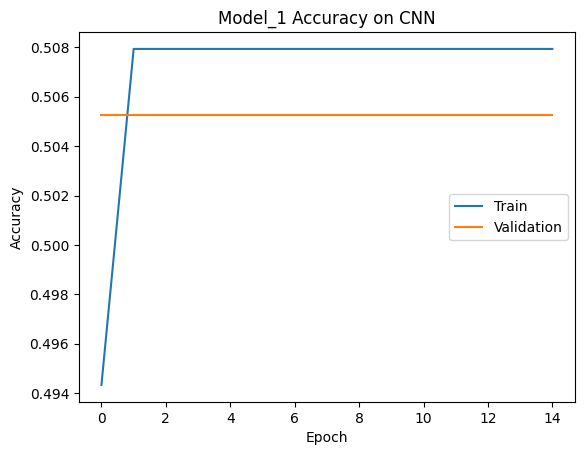

In [23]:
# Model Evaluation of CNN
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model_1 Accuracy on CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()

Observations:

We can see from the above plot that the model has perfomed not that well on the train and validation data, with a validation accuracy of 50.53%.

In [27]:
# Performance Metrics of all the Training Data
model_1_train_perf = model_performance_classification(model_1, X_train_normalized,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.507937  0.507937   0.257999  0.342189


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


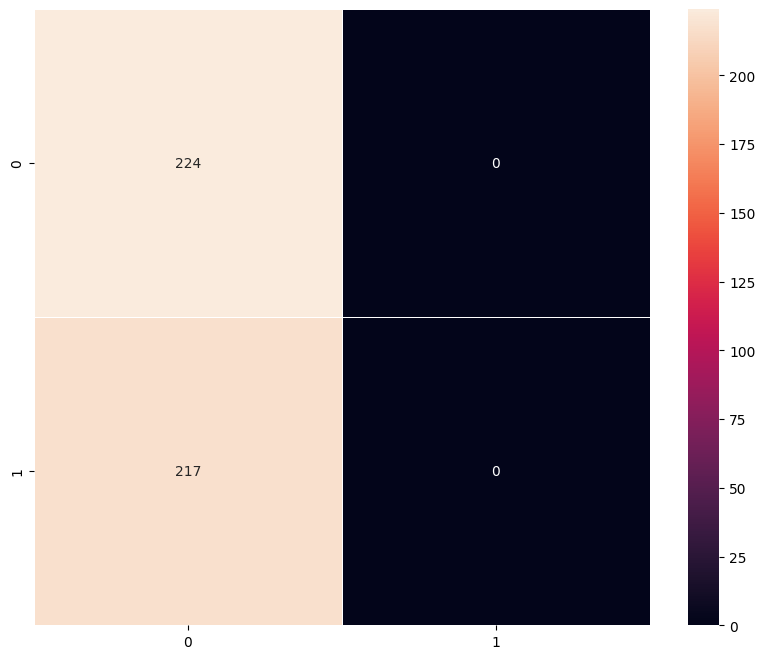

In [28]:
# Plot confusion matrix for the Training Data
plot_confusion_matrix(model_1,X_train_normalized,y_train_encoded)

* From the confusion matrix of the Training data, we could infer that 217 out of 441 images have been predicted incorrectly !

In [26]:
# Model Performance Evaluation for the Validation data
model_1_valid_perf = model_performance_classification(model_1, X_val_normalized,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.505263  0.505263   0.255291  0.339198


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


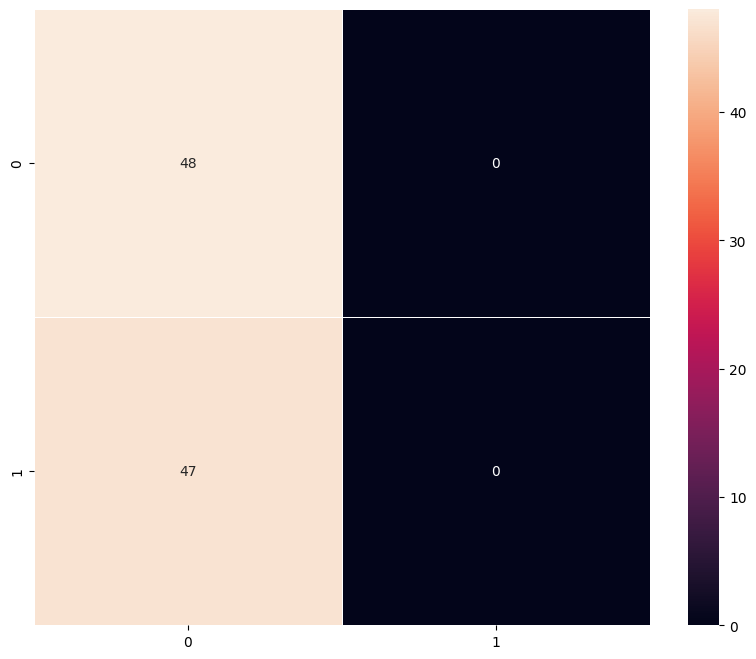

In [29]:
# Plot the Confusion matrix for the Validation data
plot_confusion_matrix(model_1,X_val_normalized,y_val_encoded)

* From the Confusion Matrix of the Validation data, we could infer that 47 out of 95 images, the prediction have gone wrong !

### Vizualizing the predictions

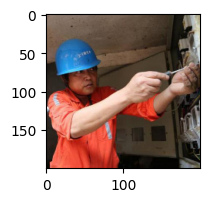

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Label: 0
True Label: Label    1
Name: 173, dtype: int64


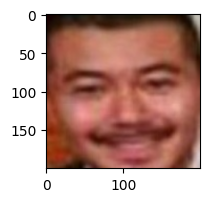

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label: 0
True Label: Label    0
Name: 462, dtype: int64


In [30]:
# For index 12 Prediction on the Validation data
plt.figure(figsize=(2,2))
plt.imshow(X_val[12])
plt.show()
prediction = model_1.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[12]
print('True Label:', true_label)

# For index 33 Prediction on the Validation data
plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
prediction = model_1.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[33]
print('True Label:', true_label)

## Observation

The Accuracy of 50% in Validation data is reflected in the Index# 12 Image with the photo showing the worker wearing the helmet, but the prediction is incorrect !

## Model 2: (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.

In [31]:
# VGG Model selection with the input shape of the images as 200x200x3 channels
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [33]:
# VGG model used as the base
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid')) # Output Layer is 1 for the Neuron to predict Worker is with Helmet or Not

In [34]:
opt=Adam(learning_rate=0.01) #Setting the Learning rate to 0.01
# Compile model to depict the accuracy metric
model_2.compile(optimizer=opt, loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [35]:
# Generating the summary of the model
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [36]:
# Creating an instances of ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator()

In [37]:
# Epochs and batch size are similar to the CNN model# model_1
epochs = 15
# Batch size
batch_size = 64

history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                      batch_size=batch_size,
                                      seed=42,
                                      shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 484ms/step - accuracy: 0.6008 - loss: 2.1824 - val_accuracy: 0.9368 - val_loss: 0.2013
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8906 - loss: 0.4332 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9789 - val_loss: 0.2763
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9684 - val_loss: 0.3312
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.9906 - loss: 0.0577 - val_accuracy: 0.9579 - val_loss: 0.5511
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9579 - val_loss: 0.5411
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.9870 - loss: 0.0325 - val_accuracy: 0.9789 - val_loss: 0.3792
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 6.9905e-05 - val_accuracy: 0.9789 - val_loss

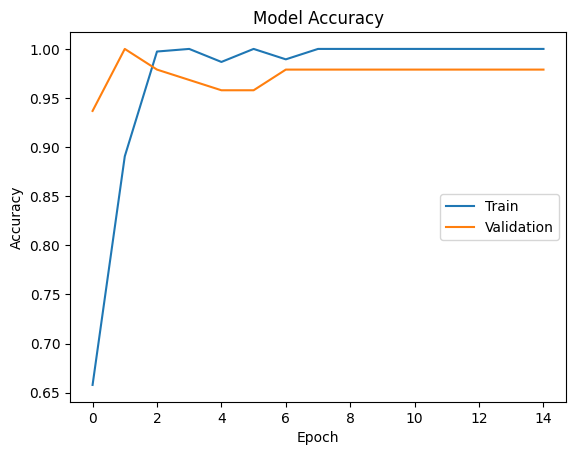

In [38]:
# Model evaluation on the VGG (Base) model
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()

Observations:

We can see from the above plot that the model has perfomed very well on the train and validation data, with a validation accuracy of 97.89%.

In [39]:
# Metrics of all the Training Data
model_2_train_perf = model_performance_classification(model_2, X_train_normalized,y_train_encoded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step


In [40]:
print("Train performance metrics of VGG(base) model")
print(model_2_train_perf)

Train performance metrics of VGG(base) model
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step


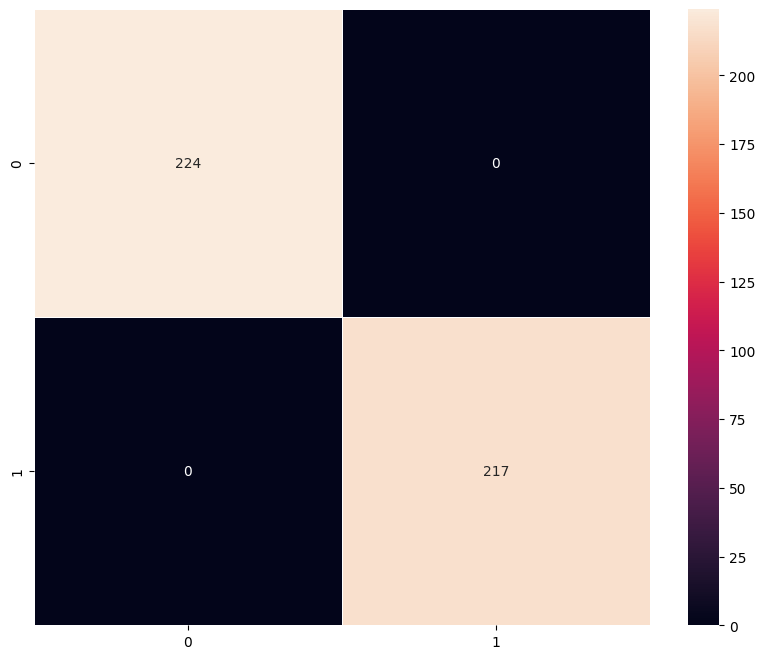

In [41]:
# Plot confusion matrix for the Training Data
plot_confusion_matrix(model_2,X_train_normalized,y_train_encoded)

* From the Confusion Matrix of the Training data, we could infer that all 441 images, the prediction are all correct !

In [42]:
# Model Performance Evaluation for the Validation data
model_2_valid_perf = model_performance_classification(model_2, X_val_normalized,y_val_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [43]:
print("Validation performance metrics for VGG Model Validation data")
print(model_2_valid_perf)

Validation performance metrics for VGG Model Validation data
   Accuracy    Recall  Precision  F1 Score
0  0.978947  0.978947   0.979807  0.978943


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


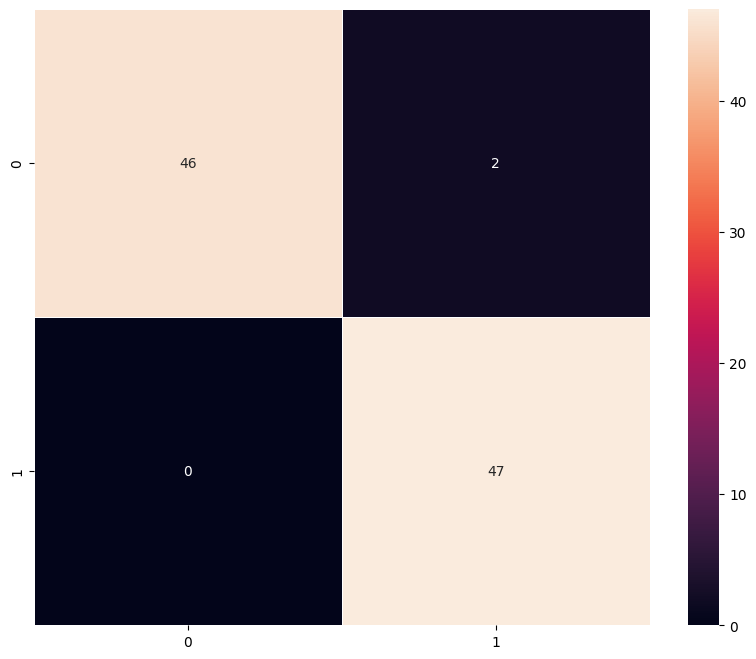

In [44]:
# Plot the Confusion matrix for the Validation data
plot_confusion_matrix(model_2,X_val_normalized,y_val_encoded)

* From the Confusion Matrix of the Training data, we could infer that only 2 out of 95 images, the prediction have gone wrong, hence accuracy as 97.89%

### Visualizing the prediction:

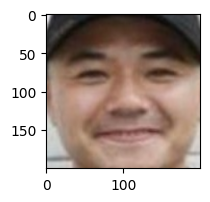

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label: 0
True Label: Label    0
Name: 541, dtype: int64


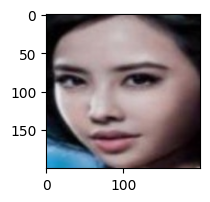

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label: 0
True Label: Label    0
Name: 376, dtype: int64


In [49]:
# For index 9 Prediction on the Validation data using the VGG Model
plt.figure(figsize=(2,2))
plt.imshow(X_val[9])
plt.show()
prediction = model_2.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[9]
print('True Label:', true_label)

# For index 34 Prediction on the Validation data
plt.figure(figsize=(2,2))
plt.imshow(X_val[34])
plt.show()
prediction = model_2.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[34]
print('True Label:', true_label)

## Observation

- Even with the Cap worn by the person, the VGG model predicts correctly both the images index# 9 and 34.

## Model 3: (VGG-16 (Base + FFNN))

- We will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten layer and a Feed Forward Neural Network.

In [50]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding the output layer with just 1 neuron
model_3.add(Dense(1, activation='sigmoid'))

# Adam Optimizer variable with 0.01 Learning rate
opt = Adam(learning_rate=0.01)

In [51]:
# Compile model# 3
model_3.compile(optimizer=opt,loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [52]:
# Generating the summary of the model
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
# Train model_3 from train_datagen
history_3 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       seed=42,
                                       shuffle=False),
                    epochs=15,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.5495 - loss: 4.9842 - val_accuracy: 0.5474 - val_loss: 3.1286
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5789 - loss: 2.8481 - val_accuracy: 0.6105 - val_loss: 2.0053
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.9115 - loss: 0.6241 - val_accuracy: 1.0000 - val_loss: 2.7912e-04
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 1.0000 - loss: 5.5772e-07 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.9992 - loss: 0.0013 - val_accuracy: 0.9789 - val_loss: 0.1648
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 1.0000 - loss: 2.1169e-09 - val_accuracy: 0.9789 - val_loss: 0.1866
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - accuracy: 0.9964 - loss: 0.0138 - val_accuracy: 0.9789 - val_loss: 0.2649
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 1.0000 - loss: 6.6869e-08 - val_accuracy: 0.978

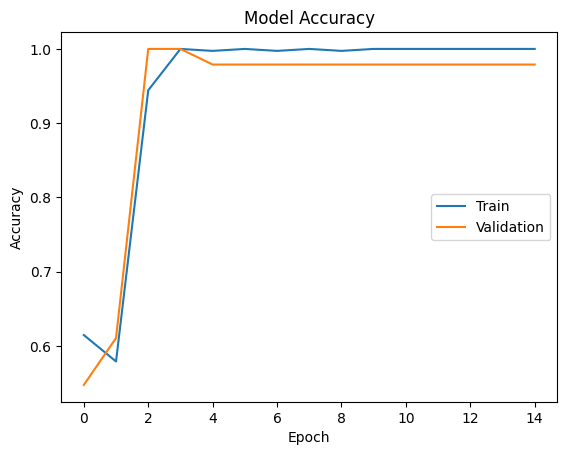

In [54]:
# Model evaluation on the Model 3: (VGG-16 (Base + FFNN))
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()


###Observations:

We can see from the above plot that the model has perfomed well on the train and validation data, with a validation accuracy of 97.89%.

In [55]:
# Metrics of all the Training Data
model_3_train_perf = model_performance_classification(model_3, X_train_normalized,y_train_encoded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step


In [56]:
print("Training data performance metrics")
print(model_3_train_perf)

Training data performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step


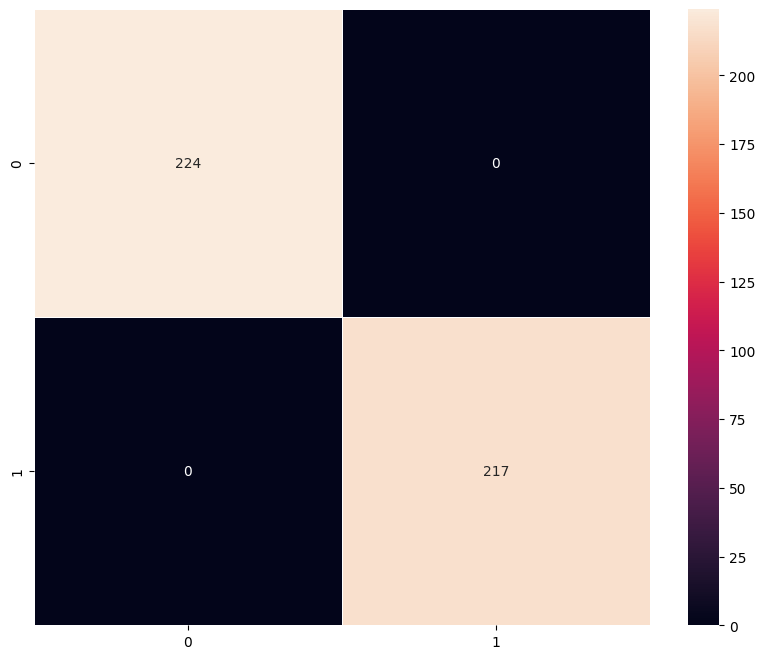

In [57]:
# Plot confusion matrix for the Training Data
plot_confusion_matrix(model_3,X_train_normalized,y_train_encoded)

Observations:

From the Confusion Matrix of the Training data, we could infer that all 441 images, the prediction are all correct !

In [58]:
# Model Performance Evaluation for the Validation data
model_3_valid_perf = model_performance_classification(model_3, X_val_normalized,y_val_encoded)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [59]:
print("Validation performance metrics")
print(model_3_valid_perf)

Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.978947  0.978947   0.979807  0.978943


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


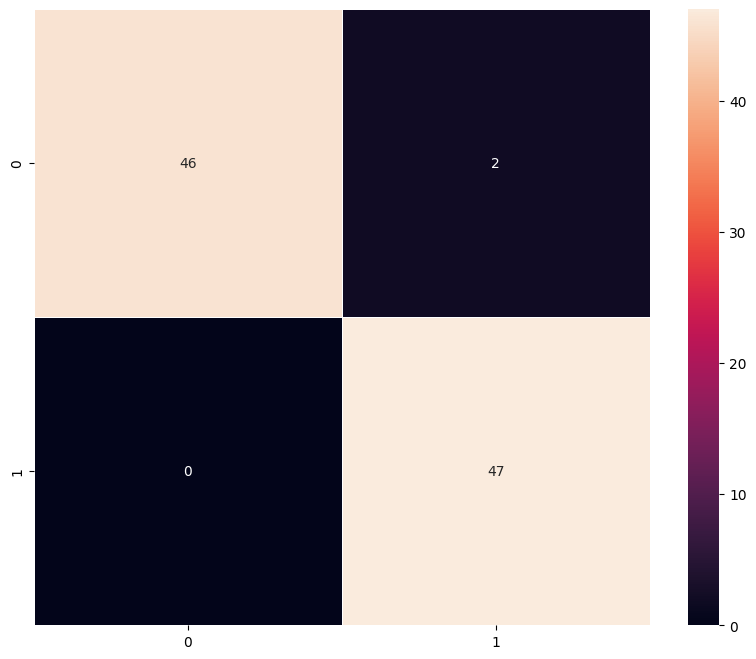

In [60]:
# Plot the Confusion matrix for the Validation data
plot_confusion_matrix(model_3,X_val_normalized,y_val_encoded)

Observations:

From the Confusion Matrix of the Validation data, we could infer that only 2 images have been predicted incorrectly out of 95 images.

#### Visualizing the predictions

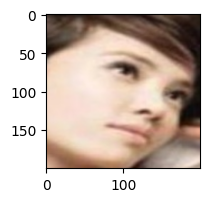

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Label: 0
True Label: Label    0
Name: 303, dtype: int64


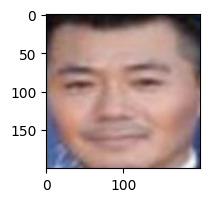

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Label: 0
True Label: Label    0
Name: 487, dtype: int64


In [62]:
# For index 3 Prediction on the Validation data using the (VGG-16 (Base + FFNN))
plt.figure(figsize=(2,2))
plt.imshow(X_val[3])
plt.show()
prediction = model_2.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[3]
print('True Label:', true_label)

# For index 39 Prediction on the Validation data
plt.figure(figsize=(2,2))
plt.imshow(X_val[39])
plt.show()
prediction = model_2.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[39]
print('True Label:', true_label)

## Observation

- In the Model#3, both the images index# 3 and 39 are predicted correctly in the Validation dataset !

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [63]:
model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

#Adding the Feed Forward neural network
model_4.add(Dense(256,activation='relu'))
model_4.add(Dropout(rate=0.4))
model_4.add(Dense(32,activation='relu'))

# Adding the output layer with just 1 neuron
model_4.add(Dense(1, activation='sigmoid'))

# Adam Optimizer variable with 0.01 Learning rate
opt = Adam(learning_rate=0.01)

In [64]:
# Compile model# 4 with Binary Cross Entropy function with Accuracy metrics
model_4.compile(optimizer=opt,loss=keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [65]:
# Generating the summary of the model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,441,793 (74.16 MB)

 Trainable params: 4,727,105 (18.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [67]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20, #defines the range for rotation
                              fill_mode='nearest', #Fill in newly created pixels after transformations using nearest pixel values
                              width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
                              height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
                              shear_range=0.3,          # Apply shear transformations up to 0.3 radians
                              zoom_range=0.4            # Randomly zoom images in or out by up to 40%
                              )

In [68]:
# Train model_4 from train_datagen
history_4 = model_4.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=64,
                                       seed=42,
                                       shuffle=False),
                    epochs=15,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5966 - loss: 10.0026 - val_accuracy: 0.9895 - val_loss: 0.0148
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.9219 - loss: 0.3516 - val_accuracy: 0.9895 - val_loss: 0.0475
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 737ms/step - accuracy: 0.8717 - loss: 0.5400 - val_accuracy: 1.0000 - val_loss: 1.5329e-04
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.9688 - loss: 0.3450 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 857ms/step - accuracy: 0.9711 - loss: 0.1786 - val_accuracy: 0.9895 - val_loss: 0.0224
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 2.1984e-06 - val_accuracy: 1.0000 - val_loss: 3.5521e-04
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 743ms/step - accuracy: 0.9841 - loss: 0.0838 - val_accuracy: 1.0000 - val_loss: 4.8728e-08
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 1.0000 - loss: 6.2475e-04 - val_accuracy: 1.0

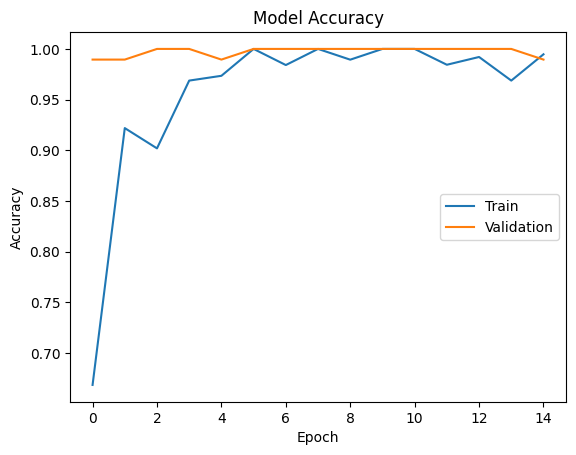

In [69]:
# Model evaluation on the Model 4: (VGG-16 (Base + FFNN + Data Augmentation)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='right')
plt.show()


Observations:

We can see from the above plot that the model has perfomed very well on the train and validation data, with a validation accuracy of 98.95%.

In [70]:
# Metrics of all the Training Data
model_4_train_perf = model_performance_classification(model_4, X_train_normalized,y_train_encoded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step


In [71]:
print("Training data performance metrics")
print(model_4_train_perf)

Training data performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step


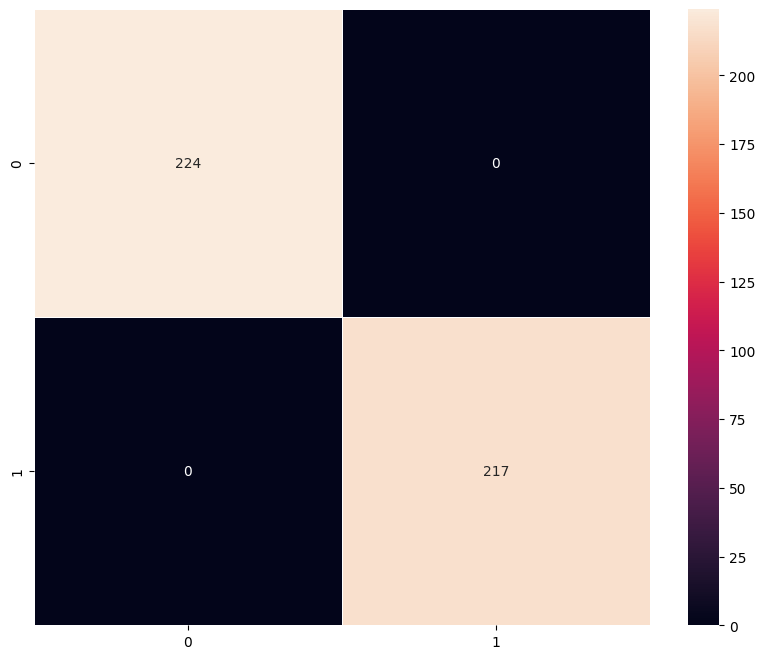

In [72]:
# Plot confusion matrix for the Training Data
plot_confusion_matrix(model_4,X_train_normalized,y_train_encoded)

Observations:

From the Confusion Matrix of the Training data, we could infer that all 441 images, the prediction are all correct !

In [73]:
# Model Performance Evaluation for the Validation data
model_4_valid_perf = model_performance_classification(model_4, X_val_normalized,y_val_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


In [74]:
print("Validation performance metrics")
print(model_4_valid_perf)

Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.989474  0.989474   0.989693  0.989474


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


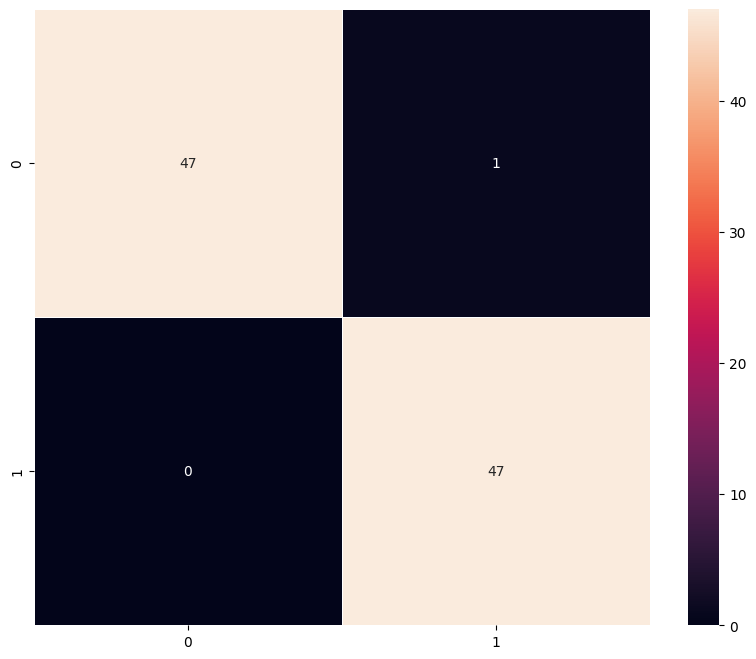

In [75]:
# Plot the Confusion matrix for the Validation data
plot_confusion_matrix(model_4,X_val_normalized,y_val_encoded)

Observations:

From the Confusion Matrix of the Validation data, we could infer that only 1 images has been predicted incorrectly out of 95 images, rest 94 are predicted correctly !

#### Visualizing the predictions

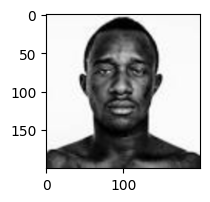

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label: 0
True Label: Label    0
Name: 597, dtype: int64


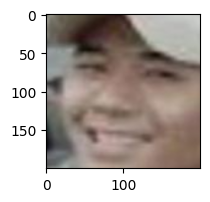

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Label: 0
True Label: Label    0
Name: 401, dtype: int64


In [79]:
# For index 10 Prediction on the Validation data
plt.figure(figsize=(2,2))
plt.imshow(X_val[10])
plt.show()
prediction = model_4.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[10]
print('True Label:', true_label)

# For index 40 Prediction on the Validation data
plt.figure(figsize=(2,2))
plt.imshow(X_val[40])
plt.show()
prediction = model_4.predict(X_val_normalized[2].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[40]
print('True Label:', true_label)

### Observation
Even with the Cap worn by the person in image (index#40), the VGG model predicts correctly both the images index# 10 and 40.

# **Model Performance Comparison and Final Model Selection**

In [80]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [81]:
# Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [82]:
# Display the Training Data's Performance Metrics Comparison
models_train_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.507937,1.0,1.0,1.0
Recall,0.507937,1.0,1.0,1.0
Precision,0.257999,1.0,1.0,1.0
F1 Score,0.342189,1.0,1.0,1.0


In [83]:
# Display the Validation Data's Performance Metrics Comparison
models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.505263,0.978947,0.978947,0.989474
Recall,0.505263,0.978947,0.978947,0.989474
Precision,0.255291,0.979807,0.979807,0.989693
F1 Score,0.339198,0.978943,0.978943,0.989474


In [84]:
# Difference between the Training and Validation Performance Metrics
models_train_comp_df - models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.002673,0.021053,0.021053,0.010526
Recall,0.002673,0.021053,0.021053,0.010526
Precision,0.002709,0.020193,0.020193,0.010307
F1 Score,0.002991,0.021057,0.021057,0.010526


### Observation:

- VGG-16 (Base+FFNN+Data Aug) has acheived the highest performance in the training set. Also, it has acheived 98.95% in the Validation set.

- With the difference between the two being the least at 0.0105 is the best, in comparison with the other models# model_3, model_2 and model_1 !

- We'll move ahead with the VGG-16 (Base+FFNN+Data Aug) as our final model.

## Test Performance

In [87]:
# Performance Metrics of all the Test Data
model_test_perf = model_performance_classification(model_4, X_test_normalized,y_test_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [88]:
# Display the Model 4 performance on the Test data
model_test_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


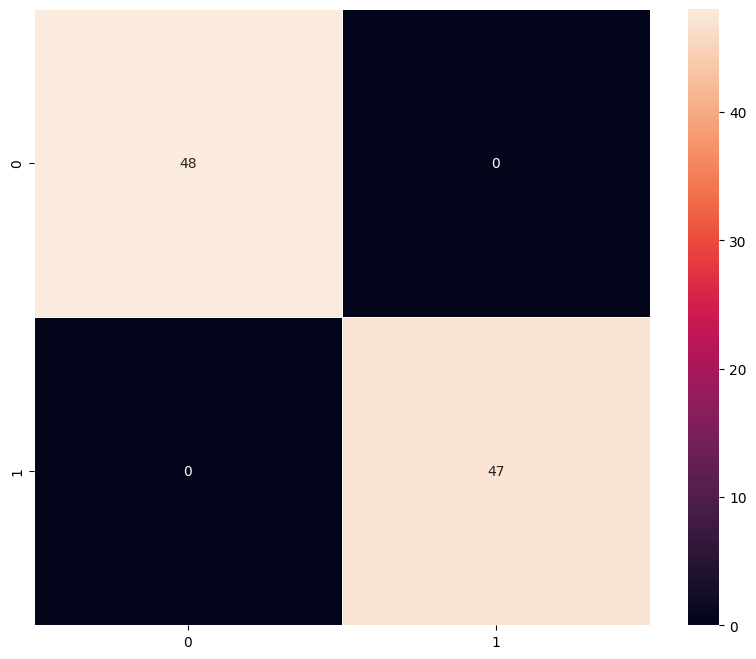

In [89]:
# Plot the Confusion matrix for the Test data evaluation
plot_confusion_matrix(model_4, X_test_normalized,y_test)

Observations:

We can see from the above plot that the model has perfomed very well on the test data with an accuracy of 100%, with none of the images predicted incorrectly !

# **Actionable Insights & Recommendations**

- Adding a feed-forward neural network on top of the VGG-16 base model, along with the Data Augmentation significantly improved performance. This suggests that while the pre-trained features were beneficial, further refining them with an additional neural network tailored to our dataset enhanced the results.

- However, the CNN (Convolution Neural Network) did not perform better at all with accuracy in mid-50s. To address this, data augmentation techniques can be applied as a form of regularization and we could see the tremendrous difference, with Model#2 (VGG) Transfer learning itself, aided well by the Data Augmentation !

- Although the performance of Model 4 is on par with Models 2 and 3, Data Augmentation adds the pinnacle of the performance in classification of whether the helmet is worn or not by the worker in the images, will be the model to be productionized !!

- These models can be further improved by training with different filter sizes and different number of filters.

- These models can also be trained on the interpolation aspects of dimensionality reduction of the images, as well on the model's performance aspects, with all the images having smaller dimension of pixel values - would be interesting to explore further !

- Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance, during the Monitoring of the model in the real Production environment and by collecting feedback on the performance, based on different real-time data.

- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification, on the Training data first, leading to classifying images on further unseen data
!

### Further Recommendations:

- Optimize the model for real-time classification by exploring lightweight architectures to reduce computational costs.
- Investigate additional feature engineering approaches, such as texture or shape analysis, to enhance model robustness.

-
-

<font size=5 color='blue'>Power Ahead!</font>
___